## 로지스틱 회귀 하이퍼 파라미터 튜닝

### 로지스틱 회귀 파라미터 C
C 값이 클수록 모델은 지도 데이터를 완전히 분류하라 수있는 식별 경계선을 학습
scikit-learn 로지스틱 회귀 C 기본값 1.0이다.

### 로지스틱 회귀 파라미터 penalty
penalty는 모델의 복잡성에 대한 패널티 L1, L2
- L1 : 데이터의 특징량을 중심으로 실별 경계선의 일반화를 도모
- L2 : 데이터 전체의 가중치를 줄임으로써 식별 경계선의 일반화를 도모

### 로지스틱 회귀 파라미터 mult_class
mult_class 는 다항 분류에서 모델의 동작을 결정
- ovr : 클래스에 대해 '속하는/속하지않는' 두값으로 답하는 문제에 적합
- multnormail : 각 클래스로 분류될 확률도 고려되어 '속하는/속하지않는' 그리고 '속할 가능성이 얼마인가' 를 다루는 문제에 적합.

### 로지스틱 회귀 파라미터 random_state
모델은 학습시 데이터를 임의의 순서로 처리해 나감.
random_state 는 그 순서를 제어를 함.
로지스틱 회귀 모델은 처리 순서 때문에 경계선이 변경되는 경우가 있다.
random_state 값을 고정시켜 동일한 학습 결과를 보전할 경우.

In [0]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline

In [0]:
# 데이터 생성
X, y = make_classification(
        n_samples= 1250, n_features=4, n_informative=2, n_redundant=2, random_state=42)
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)

In [3]:
# C값의 범위 설정 (0.00001 ~ 10000)
C_list = [10**i for i in range(-5, 5)]
C_list

[1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]

In [0]:
# 그래프 작성용 빈 리스트 선언
train_accuracy = []
test_accuracy = []

In [0]:
for c in C_list:
    model = LogisticRegression(C=c, random_state=42)
    model.fit(train_X, train_y)
    
    train_accuracy.append(model.score(train_X, train_y))
    test_accuracy.append(model.score(test_X, test_y))

In [6]:
train_accuracy

[0.6232657417289221,
 0.9295624332977588,
 0.9295624332977588,
 0.927427961579509,
 0.9306296691568837,
 0.9306296691568837,
 0.9306296691568837,
 0.9306296691568837,
 0.9306296691568837,
 0.9306296691568837]

In [7]:
test_accuracy

[0.5942492012779552,
 0.9329073482428115,
 0.9297124600638977,
 0.9201277955271565,
 0.9265175718849841,
 0.9265175718849841,
 0.9265175718849841,
 0.9265175718849841,
 0.9265175718849841,
 0.9265175718849841]

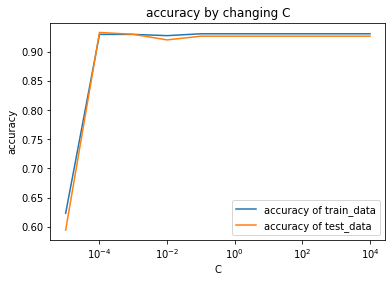

In [8]:
# 정확도 시각화
# semilogx()는 x의 스케일을 10의 x승 스케일로 변경
plt.semilogx(C_list, train_accuracy, label='accuracy of train_data')
plt.semilogx(C_list, test_accuracy, label='accuracy of test_data')
plt.title('accuracy by changing C')
plt.xlabel('C')
plt.ylabel('accuracy')
plt.legend()
plt.show()